<a href="https://colab.research.google.com/github/hajyhia/Plant-Diseases-Classification/blob/main/crops_detectetion_using_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle

##  link dataset https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset

# Download dataset

In [2]:
import os
os.environ['KAGGLE_USERNAME'] = 'username'
os.environ['KAGGLE_KEY'] = 'key'

from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"shehabhajyahia","key":"89366cc6c091dc7c2d250e3665c21252"}'}

In [3]:
!kaggle datasets download -d vipoooool/new-plant-diseases-dataset

Dataset URL: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset
License(s): copyright-authors
 98% 2.64G/2.70G [00:06<00:00, 106MB/s] 
100% 2.70G/2.70G [00:06<00:00, 452MB/s]


## Unzip dataset and folder set up

In [4]:
!unzip new-plant-diseases-dataset.zip -d new-plant-diseases-dataset/
!rm -rf '/content/new-plant-diseases-dataset/new plant diseases dataset(augmented)'

# create working directoy
os.makedirs('/content/working', exist_ok=True)

Streaming output truncated to the last 5000 lines.
  inflating: new-plant-diseases-dataset/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/273a7a9e-18be-4b6a-976a-fa5ffd69b731___RS_HL 4366_90deg.JPG  
  inflating: new-plant-diseases-dataset/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/275f8963-f4f4-4903-962b-1da716725d08___RS_HL 4780_90deg.JPG  
  inflating: new-plant-diseases-dataset/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/275f8963-f4f4-4903-962b-1da716725d08___RS_HL 4780_new30degFlipLR.JPG  
  inflating: new-plant-diseases-dataset/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/27c2aaa4-de4b-4fb1-ba8d-14d4b24b2afa___RS_HL 4665.JPG  
  inflating: new-plant-diseases-dataset/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Stra

# ***Import Libarys***

In [5]:
!pip install tensorflow

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization,GlobalAveragePooling2D
from tensorflow.keras.initializers import GlorotNormal
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow import keras
from tensorflow.keras.optimizers import Adam


from keras.models import load_model
from keras.preprocessing.image import load_img, img_to_array
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.applications.resnet import ResNet101
from tensorflow.keras.applications import ResNet50
from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications import EfficientNetV2L

import random
import os
import warnings
warnings.filterwarnings('ignore')
print('compelet')

print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))

compelet
Num GPUs Available: 1


# ***Data understanding & Visualizatio***

In [24]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

np.random.seed(42)
tf.random.set_seed(42)

# Parameters
image_shape = (224, 224)
batch_size = 64
epochs = 25  # Adjust as needed
data_path = '/content/new-plant-diseases-dataset/'

# Paths (make sure data_path is defined)
train_folder = os.path.join(data_path, 'New Plant Diseases Dataset(Augmented)', 'New Plant Diseases Dataset(Augmented)', 'train')
valid_folder = os.path.join(data_path, 'New Plant Diseases Dataset(Augmented)', 'New Plant Diseases Dataset(Augmented)', 'valid')

# Image generators
train_datagen = ImageDataGenerator(rescale=1/255., validation_split=0.2)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Load training data
print("Training Images:")
train_data = train_datagen.flow_from_directory(train_folder,
                                               target_size=image_shape,
                                               batch_size=batch_size,
                                               class_mode='categorical',
                                               shuffle=True,
                                               subset='training')

# Load validation data
print("Validating Images:")
valid_data = train_datagen.flow_from_directory(train_folder,
                                               target_size=image_shape,
                                               batch_size=batch_size,
                                               class_mode='categorical',
                                               shuffle=False,
                                               subset='validation')

# Load test data (separate validation folder)
print("Test Images:")
test_data = test_datagen.flow_from_directory(valid_folder,
                                             target_size=image_shape,
                                             batch_size=batch_size,
                                             class_mode='categorical',
                                             shuffle=False)


Training Images:
Found 56251 images belonging to 38 classes.
Validating Images:
Found 14044 images belonging to 38 classes.
Test Images:
Found 17572 images belonging to 38 classes.


***From previous cell we know that we have 38 class***
> * 56251 images in train data
> * 14044 images in valisation data
> * 17572 images in test data
> * 33 imgeas in test data (the label of test data is the name of image) we will uses them to predict later

***But what are 38 classes ?!***

In [8]:
# show how data store
images, labels = next(iter(train_data))
print(f'shape of image is : {images[0].shape}')

shape of image is : (224, 224, 3)


In [9]:
# Show all diseases (class names) in the dataset
diseases = os.listdir(train_folder)
print(f"Diseases in dataset {len(diseases)}:")
print(diseases)

Diseases in dataset 38:
['Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Grape___healthy', 'Blueberry___healthy', 'Tomato___Target_Spot', 'Grape___Esca_(Black_Measles)', 'Tomato___Early_blight', 'Tomato___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Cherry_(including_sour)___healthy', 'Tomato___Leaf_Mold', 'Squash___Powdery_mildew', 'Raspberry___healthy', 'Tomato___Tomato_mosaic_virus', 'Pepper,_bell___healthy', 'Potato___healthy', 'Apple___Apple_scab', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Cherry_(including_sour)___Powdery_mildew', 'Pepper,_bell___Bacterial_spot', 'Grape___Black_rot', 'Corn_(maize)___Common_rust_', 'Peach___Bacterial_spot', 'Tomato___Bacterial_spot', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Potato___Late_blight', 'Tomato___Septoria_leaf_spot', 'Soybean___healthy', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Strawberry___Leaf_scorch', 'Potato___Early_blight', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Corn_(maize)___Northern_Lea

***We notice that we have the same plant in different class such as:***
 > * Tomato___Early_blight
 > * Tomato___Late_blight
 > * Tomato___healthy
 > * ...

***so we need to know what is the different type of plant we have***

In [10]:
# identify uniqe plant in dataset
plants = []
NumberOfDiseases = 0
for plant in diseases:
    if plant.split('___')[0] not in plants:
        plants.append(plant.split('___')[0])
print(f'number of different plants is :{len(plants)}')
print(plants)

number of different plants is :14
['Apple', 'Grape', 'Blueberry', 'Tomato', 'Orange', 'Cherry_(including_sour)', 'Squash', 'Raspberry', 'Pepper,_bell', 'Potato', 'Corn_(maize)', 'Peach', 'Soybean', 'Strawberry']


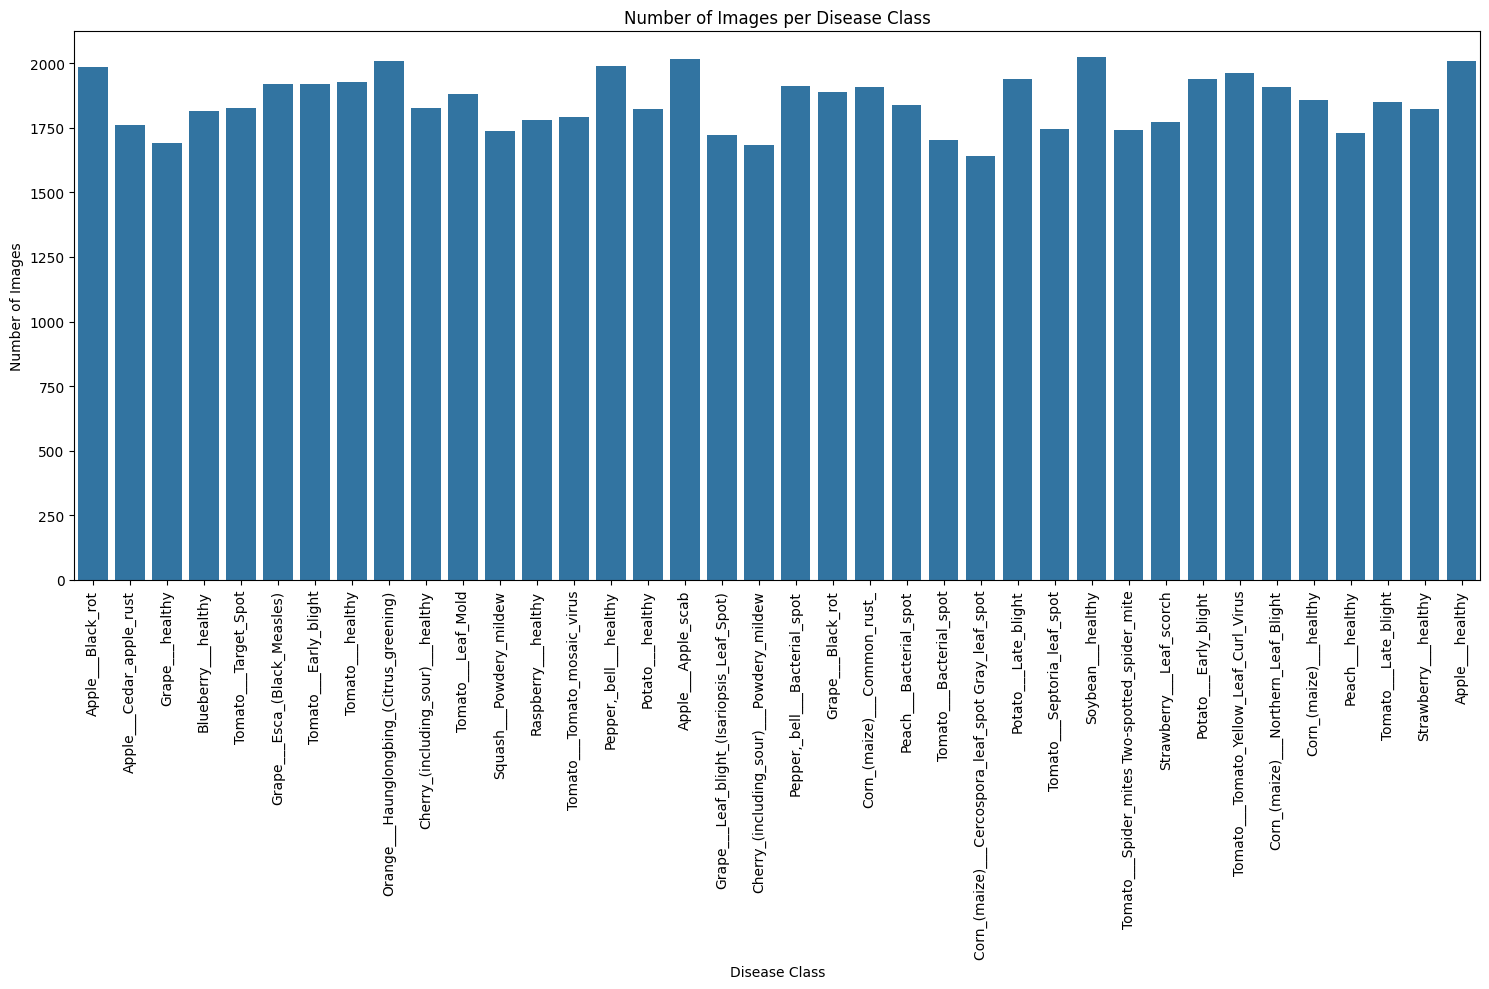

In [11]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create dictionary of class counts
dic = {}
for disease_class in diseases:
    class_path = os.path.join(train_folder, disease_class)
    dic[disease_class] = len(os.listdir(class_path))

# Convert to DataFrame
df = pd.DataFrame(list(dic.items()), columns=["Disease Class", "Number of Images"])

# Optional: sort by number of images
# df = df.sort_values(by="Number of Images", ascending=False)

# Plot
plt.figure(figsize=(15, 10))
sns.barplot(data=df, x='Disease Class', y='Number of Images')
plt.xticks(rotation=90)
plt.title("Number of Images per Disease Class")
plt.tight_layout()
plt.show()

***As we notice that classes are somewhat balanced***

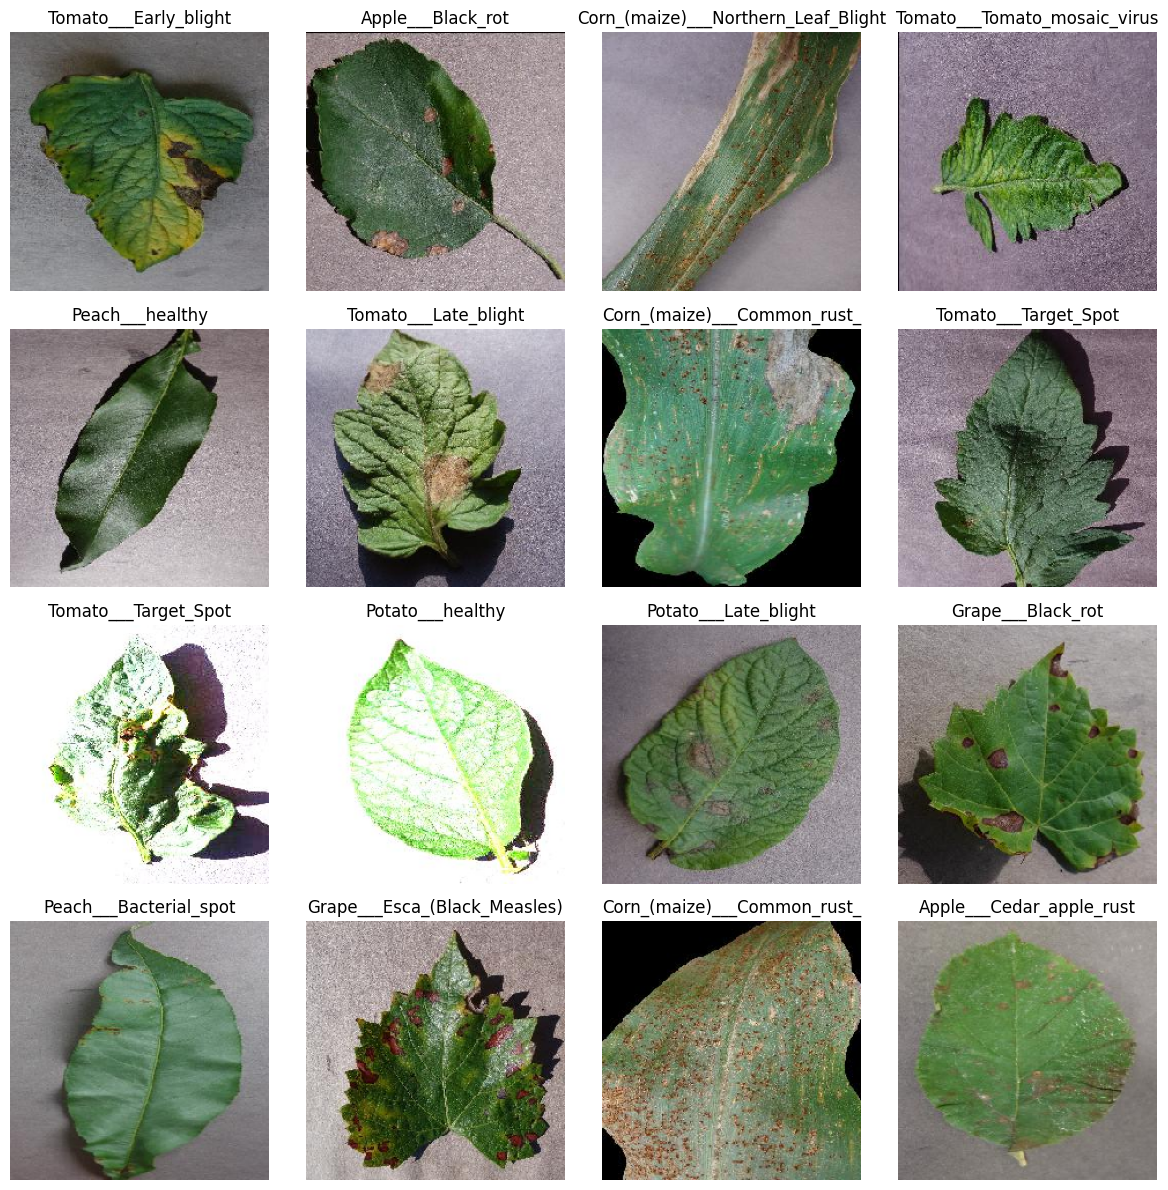

In [12]:
import random
import numpy as np

# select a specific batch
images, labels = next(iter(train_data))

# select 16 image by random
indices = random.sample(range(len(images)), 16)
selected_images = images[indices]
selected_labels = labels[indices]

class_names = list(train_data.class_indices.keys())

# plotting
plt.figure(figsize=(12, 12))
for i in range(16):
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(selected_images[i])
    plt.title(class_names[np.argmax(selected_labels[i])])
    plt.axis("off")

plt.tight_layout()
plt.show()

# ***Modeling***

***Function will be used***

Learning curve function
> * learning curve
> * loss curve

In [13]:
def plot_learning_curves(history):
    plt.figure(figsize=(12, 4))

    # accuracy curve
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy Curve')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid()

    # loss curve
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss Curve')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid()

    plt.tight_layout()
    plt.show()


Prediction function
> Compare Truth label (name of image ) with predicted label

In [14]:
def predict_labels_and_display(model_path, test_dir='/content/new-plant-diseases-dataset/test/test', image_size=(224, 224)):
    # load the best model
    best_model = load_model(model_path)

    true_labels = []
    predicted_labels = []
    images = []

    for filename in os.listdir(test_dir):
        if filename.lower().endswith(('.jpg', '.jpeg', '.png')):
            # load test images
            img_path = os.path.join(test_dir, filename)
            img = load_img(img_path, target_size=image_size)
            img_array = img_to_array(img) / 255.0
            img_array = np.expand_dims(img_array, axis=0)

            # predict
            prediction = best_model.predict(img_array, verbose=0)
            predicted_class = np.argmax(prediction, axis=1)[0]

            # extract the label (name of image)
            true_label = filename.split('.')[0]

            # get the prediction class
            class_labels = list(train_data.class_indices.keys())
            predicted_label = class_labels[predicted_class]

            true_labels.append(true_label)
            predicted_labels.append(predicted_label)
            images.append(img)

    # randomly select three images
    selected_indices = random.sample(range(len(images)), 3)

    # show selected images
    plt.figure(figsize=(15, 5))
    for i, idx in enumerate(selected_indices):
        plt.subplot(1, 3, i + 1)
        plt.imshow(images[idx])
        plt.title(f'True: {true_labels[idx]}\nPredicted: {predicted_labels[idx]}')
        plt.axis('off')

    plt.tight_layout()
    plt.show()


In [15]:
diseases_class = list(train_data.class_indices.keys())

with open("/content/working/diseases_labels", "w") as f:
    for itm in diseases_class:
        f.write(itm + "\n")

# ***CNN Model***

In [16]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization,GlobalAveragePooling2D
from tensorflow.keras.initializers import GlorotNormal
# Model Architecture
model = Sequential()

model.add(Conv2D(32,(3,3),activation = 'relu',input_shape=(224,224,3), kernel_initializer=GlorotNormal()))
model.add(Conv2D(32, (3,3), activation='relu', kernel_initializer=GlorotNormal()))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64, (3,3), activation='relu', kernel_initializer=GlorotNormal()))
model.add(Conv2D(64, (3,3), activation='relu', kernel_initializer=GlorotNormal()))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128, (3,3), activation='relu', kernel_initializer=GlorotNormal()))
model.add(Conv2D(256, (3,3), activation='relu', kernel_initializer=GlorotNormal()))
model.add(MaxPooling2D(2,2))

# model.add(Flatten())
model.add(GlobalAveragePooling2D())

model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(38, activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 220, 220, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 110, 110, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 108, 108, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 106, 106, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 53, 53, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 51, 51, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 49, 49, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 24, 24, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 256)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 744,966 (2.84 MB)

 Trainable params: 743,046 (2.83 MB)

 Non-trainable params: 1,920 (7.50 KB)

# Train Model

In [25]:
# train the model
model_checkpoint = ModelCheckpoint('/content/working/cnn_model.keras', monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, verbose=1, mode='max', restore_best_weights=True)

history = model.fit(train_data,
                    validation_data=valid_data,
                    epochs=epochs,
                    batch_size=batch_size,
                    callbacks=[model_checkpoint, early_stopping])

Epoch 1/25
879/879 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - accuracy: 0.8787 - loss: 0.3972
Epoch 1: val_accuracy improved from -inf to 0.81480, saving model to /content/working/cnn_model.keras
879/879 ━━━━━━━━━━━━━━━━━━━━ 137s 138ms/step - accuracy: 0.8787 - loss: 0.3972 - val_accuracy: 0.8148 - val_loss: 0.5818
Epoch 2/25
879/879 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - accuracy: 0.9205 - loss: 0.2543
Epoch 2: val_accuracy improved from 0.81480 to 0.92167, saving model to /content/working/cnn_model.keras
879/879 ━━━━━━━━━━━━━━━━━━━━ 116s 132ms/step - accuracy: 0.9205 - loss: 0.2543 - val_accuracy: 0.9217 - val_loss: 0.2403
Epoch 3/25
879/879 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - accuracy: 0.9371 - loss: 0.2020
Epoch 3: val_accuracy did not improve from 0.92167
879/879 ━━━━━━━━━━━━━━━━━━━━ 118s 135ms/step - accuracy: 0.9371 - loss: 0.2020 - val_accuracy: 0.8629 - val_loss: 0.4272
Epoch 4/25
879/879 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step - accuracy: 0.9451 - loss: 0.1760
Epoch 4: val_accuracy did n

In [26]:
#  save model to use later
keras_model_file = '/content/working/cnn_crops_model.keras'
model.save(keras_model_file)

In [19]:
# model.save('/content/drive/My Drive/DeepLearning_CNN/cnn_crops_model_.keras')

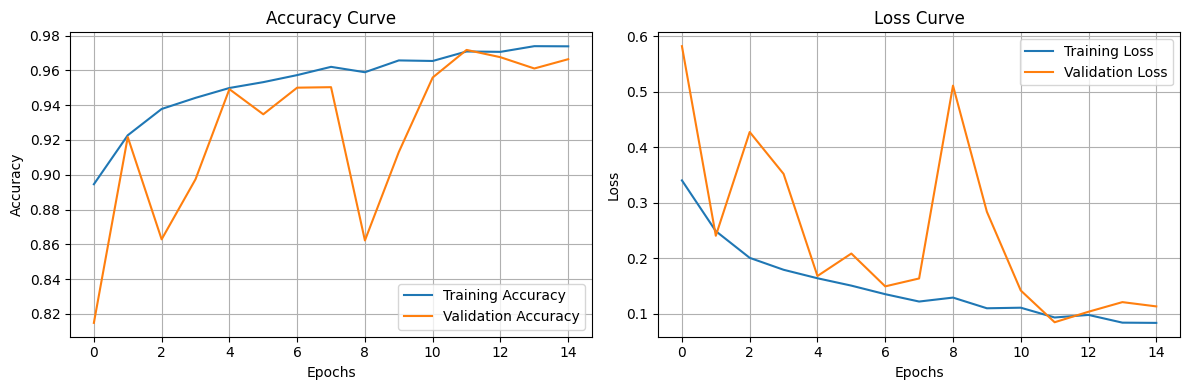

In [27]:
plot_learning_curves(history)

# Run Evaluate

In [28]:
from tensorflow.keras.models import load_model
best_model = load_model(keras_model_file)

# best_model = load_model('/content/drive/My Drive/DeepLearning_CNN/cnn_crops_model.keras')
test_loss, test_accuracy = best_model.evaluate(test_data)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

275/275 ━━━━━━━━━━━━━━━━━━━━ 31s 108ms/step - accuracy: 0.9829 - loss: 0.0532
Test Loss: 0.0734
Test Accuracy: 0.9749


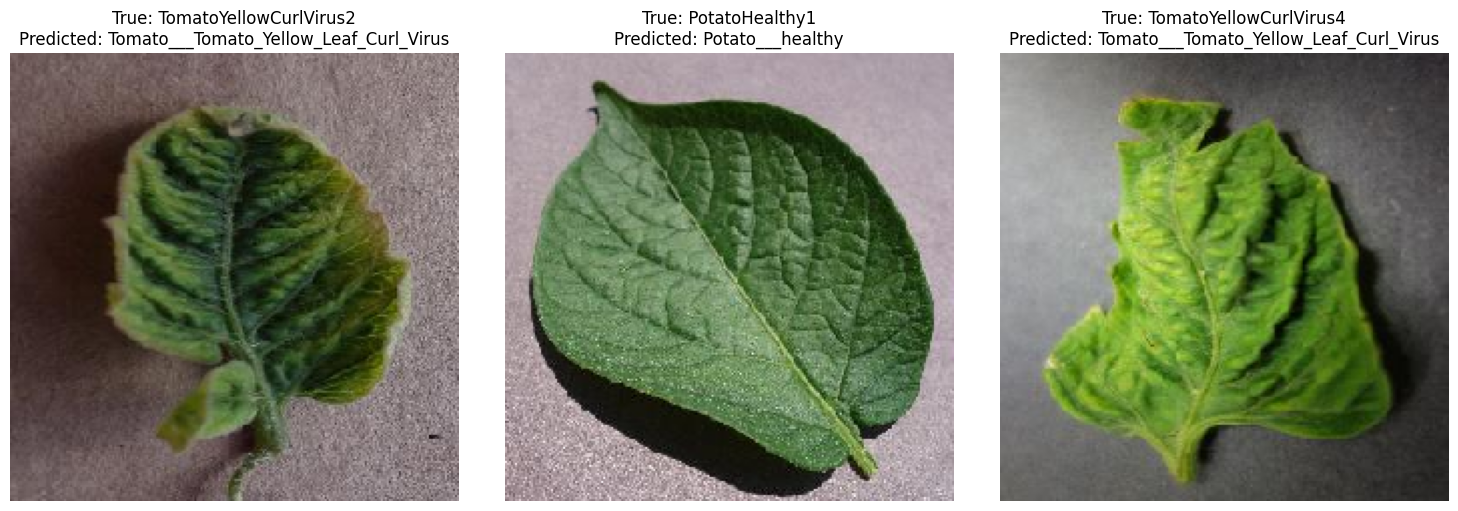

In [29]:
# show random sample of prediction of model on test data
predict_labels_and_display(keras_model_file)
# predict_labels_and_display('/content/drive/My Drive/DeepLearning_CNN/cnn_crops_model.keras')